## / prepare

In [ ]:
# https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
# data links
# https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv

In [49]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [29]:
opsd_daily = pd.read_csv('01_time_opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [30]:
# use random_state to fix output
opsd_daily.sample(10,random_state=42)

,Date,Consumption,Wind,Solar,Wind+Solar
670,2007-11-02,1408.209,NaN,NaN,NaN
2417,2012-08-14,1269.779,64.136,153.658,217.794
596,2007-08-20,1373.403,NaN,NaN,NaN
2629,2013-03-14,1420.149,28.595,62.718,91.313
1395,2009-10-27,1405.611,NaN,NaN,NaN
151,2006-06-01,1367.751,NaN,NaN,NaN
990,2008-09-17,1429.348,NaN,NaN,NaN
893,2008-06-12,1368.108,NaN,NaN,NaN
2721,2013-06-14,1235.415,128.079,145.845,273.924
2078,2011-09-10,1147.994,50.609,NaN,NaN


In [31]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

## / time index

In [32]:
# set Date to index
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.sample(10,random_state=42)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2007-11-02,1408.209,NaN,NaN,NaN
2012-08-14,1269.779,64.136,153.658,217.794
2007-08-20,1373.403,NaN,NaN,NaN
2013-03-14,1420.149,28.595,62.718,91.313
2009-10-27,1405.611,NaN,NaN,NaN
2006-06-01,1367.751,NaN,NaN,NaN
2008-09-17,1429.348,NaN,NaN,NaN
2008-06-12,1368.108,NaN,NaN,NaN
2013-06-14,1235.415,128.079,145.845,273.924


In [33]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [34]:
# is equal to this read line
opsd_daily = pd.read_csv('01_time_opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [35]:
opsd_daily.sample(10,random_state=42)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2007-11-02,1408.209,NaN,NaN,NaN
2012-08-14,1269.779,64.136,153.658,217.794
2007-08-20,1373.403,NaN,NaN,NaN
2013-03-14,1420.149,28.595,62.718,91.313
2009-10-27,1405.611,NaN,NaN,NaN
2006-06-01,1367.751,NaN,NaN,NaN
2008-09-17,1429.348,NaN,NaN,NaN
2008-06-12,1368.108,NaN,NaN,NaN
2013-06-14,1235.415,128.079,145.845,273.924


In [36]:
# add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

In [37]:
opsd_daily.sample(5, random_state=42)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2007-11-02,1408.209,NaN,NaN,NaN,2007,11,Friday
2012-08-14,1269.779,64.136,153.658,217.794,2012,8,Tuesday
2007-08-20,1373.403,NaN,NaN,NaN,2007,8,Monday
2013-03-14,1420.149,28.595,62.718,91.313,2013,3,Thursday
2009-10-27,1405.611,NaN,NaN,NaN,2009,10,Tuesday


In [39]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [40]:
# time index can use partial-string-indexing
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


## / visulization

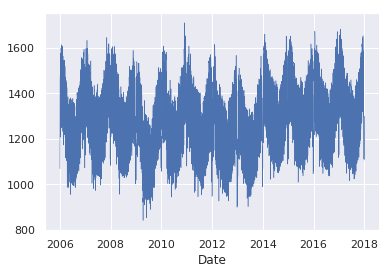

In [43]:
opsd_daily['Consumption'].plot(linewidth=0.5);

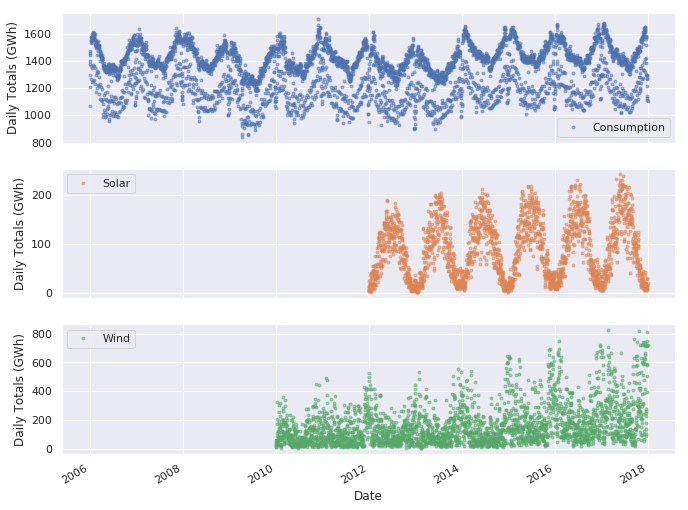

In [45]:
# 很帅气的作图,可以研究下
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

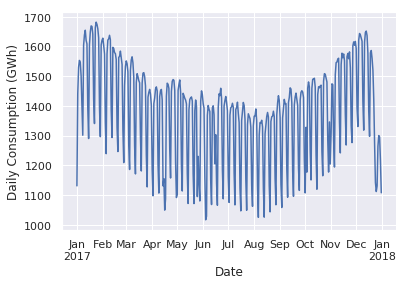

In [46]:
# 根据上图可以看出和季节关系非常密切
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

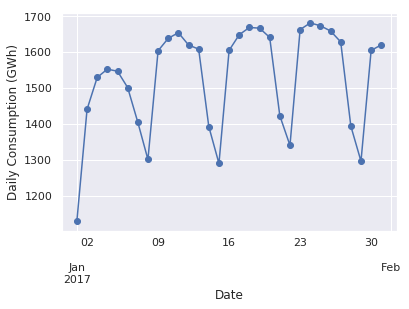

In [48]:
# 另外可以看出每周的不同,继续深入
ax = opsd_daily.loc['2017-01', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

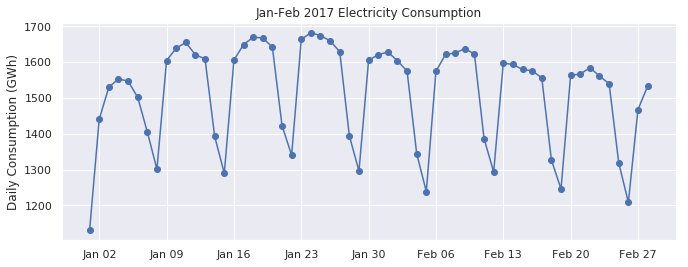

In [51]:
# 使用 mdates 处理时序输出
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

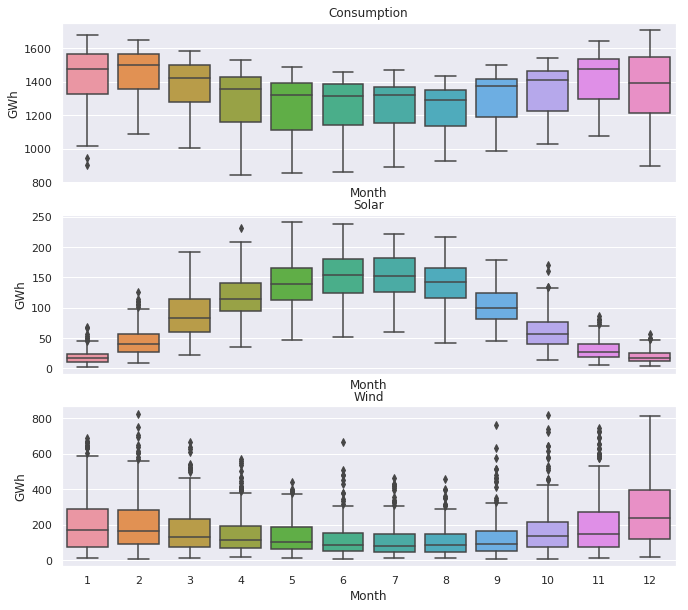

In [53]:
# 使用 sns boxplot 完成时序输出
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')

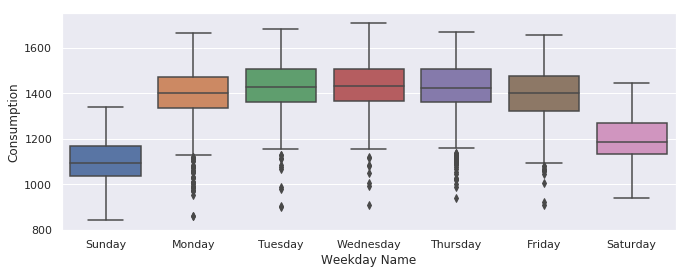

In [54]:
# 每周的输出
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');